In [1]:
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point, Polygon
import os
crs = {'init': 'epsg:4326'}
os.getcwd()

'/Users/sarah/Satellite_Image_Processing'

In [2]:
data1 = pd.read_excel('old.xlsx', header=0)
geometry1=[Point(xy) for xy in zip(data1["longitude"], data1["latitude"])]
trained = gpd.GeoDataFrame(data1, crs=crs, geometry=geometry1)

data2 = pd.read_excel('recently_added.xlsx', header =0)
geometry2=[Point(xy) for xy in zip(data2["longitude"], data2["latitude"])]
new = gpd.GeoDataFrame(data2, crs=crs, geometry=geometry2)


In [3]:
shape = gpd.read_file('../Downloads/tl_2023_37041_areawater/tl_2023_37041_areawater.shp')
shape = shape.to_crs('epsg:4326')

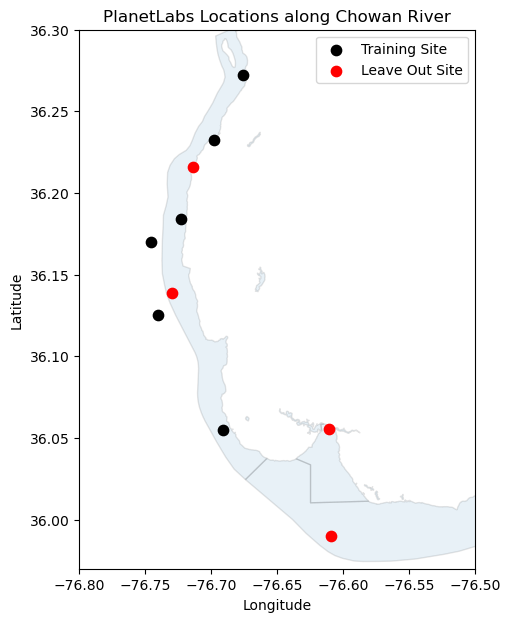

In [4]:
fig, ax = plt.subplots(figsize=(10,7))

shape.plot(ax=ax,alpha=0.1, edgecolor = 'k', linewidth=1)
trained.plot(ax=ax, color='k', markersize = 55, label = r'Training Site')
new.plot(ax=ax, color='r', markersize = 55, label = r'Leave Out Site')

ax.legend(loc=1)
ax.set_title(r'PlanetLabs Locations along Chowan River', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')
plt.ylim([35.97, 36.3])
plt.xlim([-76.8, -76.5])
plt.show()
# fig.savefig('Desktop/PMwf.png')

In [5]:
# !wget --no-check-certificate https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json

In [6]:
import json
e = json.load(open('world-countries.json','r'))

json.dump(e['features'][-10], open('us.json','w'))

In [7]:
# e['features'][-10]

In [8]:
# import pandas as pd
# import folium 
# df = pd.read_csv('soundsesnors.csv')
# # Assuming 'data' is your DataFrame with columns 'Latitude' and 'Longitude'
# coordinates = [(lat, lon) for lat, lon in zip(df['latitude'], df['longitude'])]
# m = folium.Map(location=[36.2326724, -76.698134], zoom_start=10,  tiles='CartoDB Voyager')
# for point in coordinates:
#     folium.CircleMarker(point, radius = 5, color = 'blue', fill = True).add_to(m)

# m

In [9]:
import pandas as pd
import folium 
df = pd.read_excel('../Documents/Blooms/Potential Sites Sarah.xlsx', header=0)

coordinates = [(lat, lon) for lat, lon in zip(df['lat'], df['long'])]

m = folium.Map(location=[36.1326724, -76.4982], zoom_start=10,  tiles='CartoDB Voyager')

for index, row in df.iterrows():
    name = row['site']
    point = (row['lat'], row['long'])
    popup_text = f"<b>{name}</b>"
#     if name.startswith('new_'):
#         color = 'red'
#     elif name.startswith('maybe_'):
#         color = 'green'
#     else:
#         color = 'blue'    
    folium.CircleMarker(point, radius=5, color='blue', fill=True, popup=popup_text).add_to(m)

m


In [2]:
import pandas as pd
import folium 
df = pd.read_csv('soundsesnors.csv')

coordinates = [(lat, lon) for lat, lon in zip(df['latitude'], df['longitude'])]

m = folium.Map(location=[36.1326724, -76.4982], zoom_start=10,  tiles='OpenStreetMap')

for index, row in df.iterrows():
    name = row['SITE']
    point = (row['latitude'], row['longitude'])
    popup_text = f"<b>{name}</b>"
    if name.startswith('D'):
        color = 'red'
    
    else:
        color = 'blue'    
    folium.CircleMarker(point, radius=5, color=color, fill=True, popup=popup_text).add_to(m)

m


In [3]:
m.save('updated_map.html')